# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 


## Project Milestone 3:  Model building

In [2]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<hr style='height:2pt'>
<div class='theme'> Discrimination Analysis </div> 

In [5]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_csv('if_loan_is_rejected.csv')

In [7]:
rej = df[df['ifrej']== 1]
acp = df[df['ifrej']== 0]

In [8]:
rej.head()

,loan_amnt,State,dti,ifrej
434407,35000.0,LA,1.0000,1
434408,7500.0,KY,0.0152,1
434409,25000.0,OK,0.9585,1
434410,3500.0,CT,0.1012,1
434411,35000.0,TX,18.6745,1


In [9]:
rej['State'].value_counts()

CA    567707
TX    429656
FL    380820
NY    354479
GA    181324
IL    174286
PA    173663
OH    172325
NC    148798
NJ    148141
MI    128894
VA    127619
TN    102583
AZ    100749
MD     99556
MA     95860
IN     89673
AL     85421
WA     83567
MO     82526
CO     81213
SC     76138
LA     72613
MN     61764
KY     61485
WI     60878
NV     58094
CT     56338
OK     54166
AR     51294
MS     50179
OR     47989
KS     39056
UT     29495
NM     28388
HI     27711
NE     22623
NH     20113
RI     19264
ME     15834
DE     15095
ID     14077
MT     11980
AK     10984
SD      9747
ND      9667
DC      9250
VT      9108
WV      8919
WY      8763
IA         1
Name: State, dtype: int64

In [10]:
acp['State'].value_counts()

CA    57888
TX    37036
NY    35505
FL    31727
IL    17715
NJ    15891
OH    14999
PA    14502
GA    14459
NC    12279
VA    11687
MI    11604
AZ    10462
MD    10071
MA     9830
CO     8798
WA     8301
MN     7699
IN     7658
TN     7272
MO     6951
CT     6794
NV     6164
WI     5791
SC     5492
AL     5329
LA     4985
OR     4669
KY     4225
OK     4061
KS     3567
AR     3335
MS     2867
UT     2796
NM     2286
NE     2116
NH     2097
HI     2019
RI     1881
ME     1409
DE     1252
ID     1225
MT     1172
ND     1051
AK     1006
DC      958
VT      942
WY      935
SD      879
WV      770
Name: State, dtype: int64

In [11]:
df = df.drop(df[df['State'] == 'IA'].index)
rej = df[df['ifrej']== 1]
acp = df[df['ifrej']== 0]

In [12]:
# The proportion of number of total loans for each state
p_all = df['State'].value_counts()/len(df)
p_all_df = pd.DataFrame({'State': p_all.index, 'All_Prop': p_all.values})
p_all_df

,State,All_Prop
0,CA,0.120208
1,TX,0.089675
2,FL,0.079271
3,NY,0.074935
4,GA,0.037620
5,IL,0.036893
6,PA,0.036156
7,OH,0.035994
8,NJ,0.031519
9,NC,0.030951


In [13]:
# The proportion of number of rejected loans for every state
p_rej = rej['State'].value_counts()/len(rej)
p_rej_df = pd.DataFrame({'State': p_rej.index, 'Rej_Prop': p_rej.values})
p_rej_df

,State,Rej_Prop
0,CA,0.119019
1,TX,0.090077
2,FL,0.079839
3,NY,0.074316
4,GA,0.038014
5,IL,0.036539
6,PA,0.036408
7,OH,0.036128
8,NC,0.031195
9,NJ,0.031058


In [14]:
state_prop = pd.merge(p_all_df, p_rej_df, how='left', on=['State'])
state_prop['Diff_Prop'] = state_prop['Rej_Prop'] - state_prop['All_Prop']
state_prop['Diff_num'] = state_prop['Diff_Prop']*len(rej)
state_prop

,State,All_Prop,Rej_Prop,Diff_Prop,Diff_num
0,CA,0.120208,0.119019,-0.001188,-5668.894348
1,TX,0.089675,0.090077,0.000402,1919.296726
2,FL,0.079271,0.079839,0.000568,2708.753770
3,NY,0.074935,0.074316,-0.000619,-2952.604762
4,GA,0.037620,0.038014,0.000395,1883.223263
5,IL,0.036893,0.036539,-0.000354,-1688.464455
6,PA,0.036156,0.036408,0.000252,1204.340388
7,OH,0.035994,0.036128,0.000134,637.141189
8,NJ,0.031519,0.031058,-0.000461,-2199.067778
9,NC,0.030951,0.031195,0.000245,1166.275108


Text(0.5,1,'Difference Between Actual and Expect Number of Rejects')

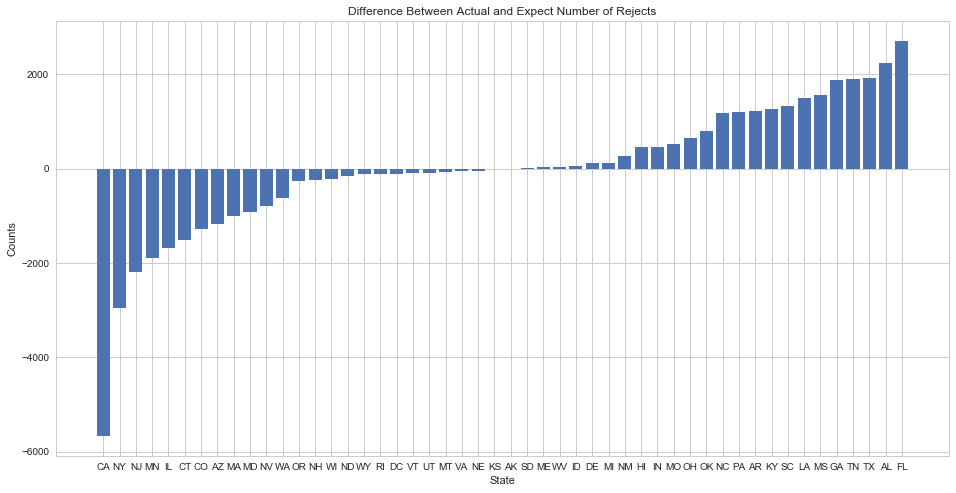

In [15]:
state_prop = state_prop.sort_values(by = 'Diff_num')
fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(x = state_prop['State'], height = state_prop['Diff_num'])

#ax.set_ylim([0.9, 0.98])
y_ticks = ax.get_yticks()
#ax.set_yticklabels(['{:3.2f}%'.format(k*100) for k in y_ticks])
ax.set_ylabel('Counts')
ax.set_xlabel('State')
ax.set_title('Difference Between Actual and Expect Number of Rejects')

In [16]:
def rej_percent(df):
    reject_percent = len(df[df['ifrej']== 1])/len(df)
    return reject_percent

rate_rej = df.groupby(['State']).apply(rej_percent)
rate_rej

State
AK    0.916097
AL    0.941278
AR    0.938952
AZ    0.905927
CA    0.907467
CO    0.902256
CT    0.892384
DC    0.906152
DE    0.923411
FL    0.923095
GA    0.926148
HI    0.932089
ID    0.919945
IL    0.907735
IN    0.921320
KS    0.916313
KY    0.935702
LA    0.935759
MA    0.906992
MD    0.908134
ME    0.918286
MI    0.917408
MN    0.889164
MO    0.922315
MS    0.945953
MT    0.910888
NC    0.923769
ND    0.901941
NE    0.914467
NH    0.905583
NJ    0.903123
NM    0.925474
NV    0.904074
NY    0.908958
OH    0.919930
OK    0.930256
OR    0.911334
PA    0.922929
RI    0.911043
SC    0.932721
SD    0.917278
TN    0.933804
TX    0.920641
UT    0.913412
VA    0.916106
VT    0.906269
WA    0.909642
WI    0.913138
WV    0.920528
WY    0.903588
dtype: float64

In [17]:
p_rej.keys()[0]

'CA'

Text(0.5,0,'State')

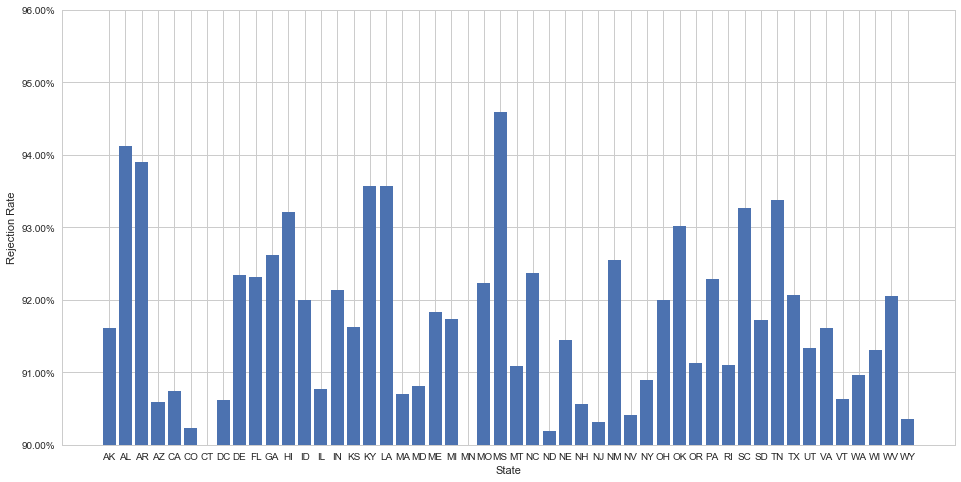

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(x = rate_rej.keys(), height = rate_rej)
xlabels =rate_rej.keys()
ax.set_ylim([0.9, 0.96])
y_ticks = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(k*100) for k in y_ticks])
ax.set_ylabel('Rejection Rate')
ax.set_xlabel('State')
#ax.set_xticklabels(xlabels, rotation=40)

In [19]:
plotly.tools.set_credentials_file(username='jingyichen', api_key='ithtgZkbeInxasauGeMe')

In [19]:
import plotly.plotly as py

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_prop['State'],
        z = state_prop['Diff_num'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bias(counts)")
        ) ]

layout = dict(
        title = 'Difference Between Actual and Expect Number of Rejects)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='lendingclub-cloropleth-map' )